In [1]:
from keras.preprocessing.image import ImageDataGenerator
def create_generators(img_size = 128, datasetpath = 'dataset', batch_size = 32):
        datagen = ImageDataGenerator(
                             rescale = 1./255,
                             rotation_range=30,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

        train_generator = datagen.flow_from_directory(
                                           datasetpath + '/' + 'training',
                                           target_size = (img_size, img_size),
                                           class_mode = 'categorical', 
                                           batch_size = batch_size
                                           )
        
        datagen = ImageDataGenerator(rescale = 1./255)

        validation_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'validation',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size
                                            )
        
        test_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'testing',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size,
                                            shuffle = False
                                            )
        
        return train_generator, validation_generator , test_generator

C:\Users\User\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
def create_model (nb_filters = 32, nb_layers = 3, img_size = 128):
    
    model = Sequential()
    
    model.add(Convolution2D(nb_filters, (3, 3), input_shape=(img_size, img_size, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    k = 1
    
    for i in range (2, (nb_layers + 1)):    
        model.add(Convolution2D(nb_filters * k, (3, 3),activation = 'relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        k = k * 2

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation = 'softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [3]:
import matplotlib.pyplot as plt
def draw_graph(History, arg): #arg = acc|loss
    plt.tight_layout()
    plt.plot(History.history[arg])
    val_arg = 'val_' + arg
    plt.plot(History.history[val_arg])
    plt.title('Model '+ arg)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

In [4]:
def save_model(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model.h5")

In [5]:
def find_label(prediction_array):
        prediction = prediction_array.argmax()
        for x in train_generator.class_indices:
            if train_generator.class_indices[x] == prediction:
                return x

In [6]:
# taken from https://scikit-learn.org/stable/auto_examples
#/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


C:\Users\User\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Users\User\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=138, epochs=50, validation_data=<keras_pre..., validation_steps=39)`
  if sys.path[0] == '':


Epoch 1/50
138/138 [==============================] - 29s 211ms/step - loss: 1.1871 - acc: 0.4539 - val_loss: 0.9393 - val_acc: 0.6340
Epoch 2/50
138/138 [==============================] - 34s 246ms/step - loss: 1.0389 - acc: 0.5500 - val_loss: 0.8896 - val_acc: 0.6242
Epoch 3/50
138/138 [==============================] - 32s 230ms/step - loss: 0.9745 - acc: 0.5849 - val_loss: 0.8458 - val_acc: 0.6765
Epoch 4/50
138/138 [==============================] - 32s 234ms/step - loss: 0.9455 - acc: 0.6016 - val_loss: 0.8997 - val_acc: 0.6356
Epoch 5/50
138/138 [==============================] - 32s 230ms/step - loss: 0.9234 - acc: 0.6107 - val_loss: 0.8304 - val_acc: 0.6846
Epoch 6/50
138/138 [==============================] - 30s 216ms/step - loss: 0.8831 - acc: 0.6411 - val_loss: 0.7832 - val_acc: 0.7042
Epoch 7/50
138/138 [==============================] - 29s 210ms/step - loss: 0.8567 - acc: 0.6511 - val_loss: 0.8441 - val_acc: 0.6699
Epoch 8/50
138/138 [==============================] - 2

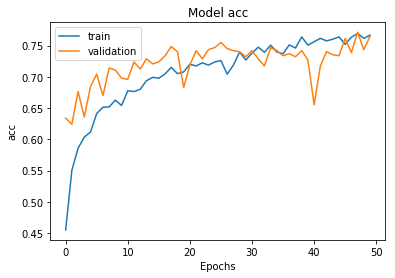

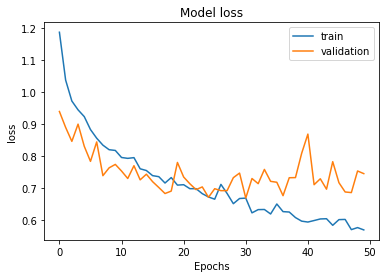

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


C:\Users\User\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=69, epochs=50, validation_data=<keras_pre..., validation_steps=20)`
  if sys.path[0] == '':


Epoch 1/50
69/69 [==============================] - 23s 339ms/step - loss: 1.3989 - acc: 0.3898 - val_loss: 1.0669 - val_acc: 0.5343
Epoch 2/50
69/69 [==============================] - 22s 326ms/step - loss: 1.1142 - acc: 0.5055 - val_loss: 0.9505 - val_acc: 0.6242
Epoch 3/50
69/69 [==============================] - 22s 323ms/step - loss: 1.0405 - acc: 0.5547 - val_loss: 0.8724 - val_acc: 0.6699
Epoch 4/50
69/69 [==============================] - 22s 320ms/step - loss: 1.0192 - acc: 0.5701 - val_loss: 0.8682 - val_acc: 0.6732
Epoch 5/50
69/69 [==============================] - 22s 323ms/step - loss: 0.9722 - acc: 0.5880 - val_loss: 0.8195 - val_acc: 0.6748
Epoch 6/50
69/69 [==============================] - 22s 323ms/step - loss: 0.9437 - acc: 0.6027 - val_loss: 0.8316 - val_acc: 0.6699
Epoch 7/50
69/69 [==============================] - 23s 328ms/step - loss: 0.9200 - acc: 0.6113 - val_loss: 0.7987 - val_acc: 0.6912
Epoch 8/50
69/69 [==============================] - 22s 321ms/step - 

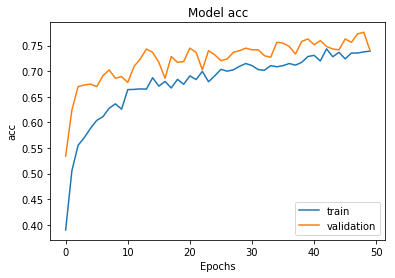

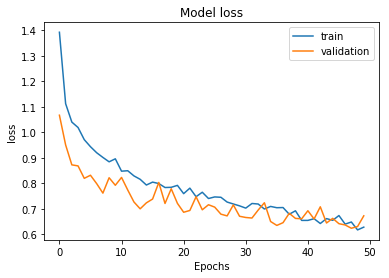

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


C:\Users\User\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=35, epochs=50, validation_data=<keras_pre..., validation_steps=10)`
  if sys.path[0] == '':


Epoch 1/50
35/35 [==============================] - 22s 639ms/step - loss: 1.3467 - acc: 0.3658 - val_loss: 1.0616 - val_acc: 0.5735
Epoch 2/50
35/35 [==============================] - 21s 611ms/step - loss: 1.1374 - acc: 0.5042 - val_loss: 0.9785 - val_acc: 0.6209
Epoch 3/50
35/35 [==============================] - 28s 798ms/step - loss: 1.0540 - acc: 0.5391 - val_loss: 0.9039 - val_acc: 0.6683
Epoch 4/50
35/35 [==============================] - 21s 604ms/step - loss: 1.0084 - acc: 0.5672 - val_loss: 0.8735 - val_acc: 0.6503
Epoch 5/50
35/35 [==============================] - 21s 603ms/step - loss: 0.9769 - acc: 0.5927 - val_loss: 0.8261 - val_acc: 0.6601
Epoch 6/50
35/35 [==============================] - 21s 608ms/step - loss: 0.9344 - acc: 0.6204 - val_loss: 0.7907 - val_acc: 0.7157
Epoch 7/50
35/35 [==============================] - 21s 599ms/step - loss: 0.9196 - acc: 0.6302 - val_loss: 0.8054 - val_acc: 0.6961
Epoch 8/50
35/35 [==============================] - 21s 610ms/step - 

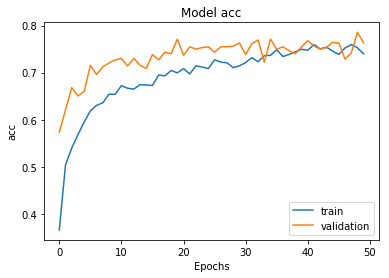

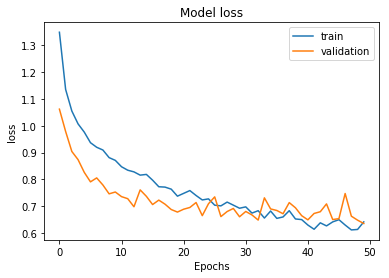

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 89s 647ms/step - loss: 1.5121 - acc: 0.4148 - val_loss: 1.0863 - val_acc: 0.5719
Epoch 2/50
138/138 [==============================] - 76s 553ms/step - loss: 1.1606 - acc: 0.5024 - val_loss: 0.9977 - val_acc: 0.6275
Epoch 3/50
138/138 [==============================] - 77s 555ms/step - loss: 1.0650 - acc: 0.5445 - val_loss: 0.9470 - val_acc: 0.6634
Epoch 4/50
138/138 [==============================] - 79s 572ms/step - loss: 1.0408 - acc: 0.5606 - val_loss: 0.9108 - val_acc: 0.6487
Epoch 5/50
138/138 [==============================] - 78s 562ms/step - loss: 1.0099 - acc: 0.5650 - val_loss: 0.8768 - val_acc: 0.6160
Epoch 6/50
138/138 [==============================] - 81s 587ms/step - loss: 0.9975 - acc: 0.5803 - val_loss: 1.0080 - val_acc: 0.5850
Epoch 7/50
138/138 [==============================] - 84s 612ms/st

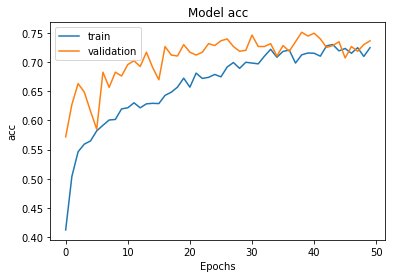

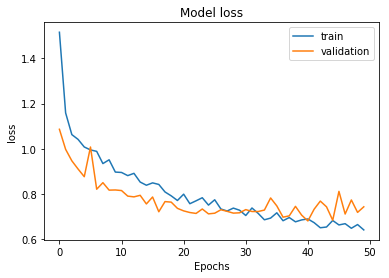

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 64s 932ms/step - loss: 3.0432 - acc: 0.3920 - val_loss: 1.0279 - val_acc: 0.5817
Epoch 2/50
69/69 [==============================] - 62s 896ms/step - loss: 1.0478 - acc: 0.5529 - val_loss: 0.8901 - val_acc: 0.6536
Epoch 3/50
69/69 [==============================] - 62s 899ms/step - loss: 1.0010 - acc: 0.5783 - val_loss: 0.8498 - val_acc: 0.6520
Epoch 4/50
69/69 [==============================] - 62s 897ms/step - loss: 0.9493 - acc: 0.6057 - val_loss: 0.8372 - val_acc: 0.6748
Epoch 5/50
69/69 [==============================] - 65s 939ms/step - loss: 0.9066 - acc: 0.6193 - val_loss: 0.8042 - val_acc: 0.6569
Epoch 6/50
69/69 [==============================] - 62s 898ms/step - loss: 0.8858 - acc: 0.6453 - val_loss: 0.8503 - val_acc: 0.6830
Epoch 7/50
69/69 [==============================] - 63s 909ms/step - loss: 0.8

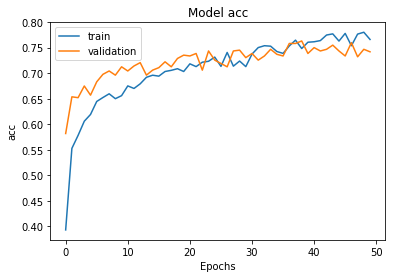

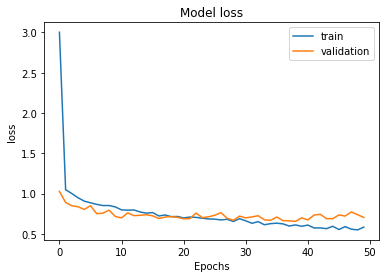

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 67s 2s/step - loss: 2.4165 - acc: 0.3269 - val_loss: 1.2191 - val_acc: 0.4118
Epoch 2/50
35/35 [==============================] - 67s 2s/step - loss: 1.2167 - acc: 0.4270 - val_loss: 1.0408 - val_acc: 0.6324
Epoch 3/50
35/35 [==============================] - 59s 2s/step - loss: 1.1181 - acc: 0.5043 - val_loss: 0.9911 - val_acc: 0.6176
Epoch 4/50
35/35 [==============================] - 57s 2s/step - loss: 1.0450 - acc: 0.5560 - val_loss: 0.9384 - val_acc: 0.6552
Epoch 5/50
35/35 [==============================] - 60s 2s/step - loss: 1.0088 - acc: 0.5819 - val_loss: 0.8547 - val_acc: 0.6748
Epoch 6/50
35/35 [==============================] - 61s 2s/step - loss: 0.9614 - acc: 0.5945 - val_loss: 0.8029 - val_acc: 0.6797
Epoch 7/50
35/35 [==============================] - 59s 2s/step - loss: 0.9284 - acc: 0.6204 - v

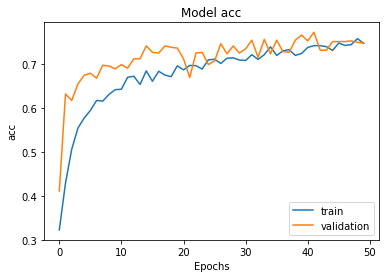

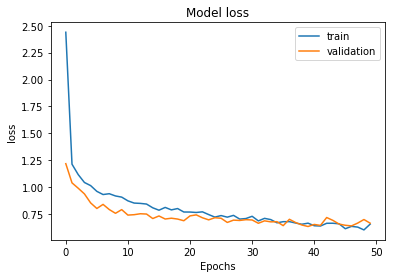

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 30s 221ms/step - loss: 1.1787 - acc: 0.4591 - val_loss: 0.9355 - val_acc: 0.6569
Epoch 2/50
138/138 [==============================] - 30s 218ms/step - loss: 1.0035 - acc: 0.5822 - val_loss: 0.8603 - val_acc: 0.6716
Epoch 3/50
138/138 [==============================] - 30s 217ms/step - loss: 0.9367 - acc: 0.6053 - val_loss: 0.8115 - val_acc: 0.6781
Epoch 4/50
138/138 [==============================] - 30s 215ms/step - loss: 0.8856 - acc: 0.6361 - val_loss: 0.7929 - val_acc: 0.6618
Epoch 5/50
138/138 [==============================] - 29s 209ms/step - loss: 0.8417 - acc: 0.6488 - val_loss: 0.7866 - val_acc: 0.6797
Epoch 6/50
138/138 [==============================] - 31s 223ms/step - loss: 0.8117 - acc: 0.6638 - val_loss: 0.7184 - val_acc: 0.7337
Epoch 7/50
138/138 [==============================] - 30s 219ms/st

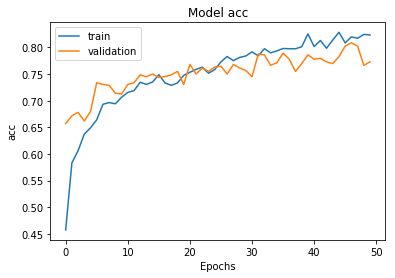

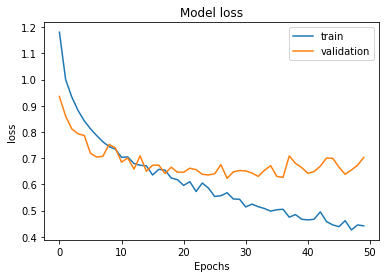

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 29s 415ms/step - loss: 1.2088 - acc: 0.4456 - val_loss: 0.9710 - val_acc: 0.5964
Epoch 2/50
69/69 [==============================] - 28s 412ms/step - loss: 1.0515 - acc: 0.5590 - val_loss: 0.9050 - val_acc: 0.6307
Epoch 3/50
69/69 [==============================] - 28s 406ms/step - loss: 0.9744 - acc: 0.5857 - val_loss: 0.8399 - val_acc: 0.6618
Epoch 4/50
69/69 [==============================] - 28s 404ms/step - loss: 0.9324 - acc: 0.6109 - val_loss: 0.8136 - val_acc: 0.6650
Epoch 5/50
69/69 [==============================] - 27s 391ms/step - loss: 0.8970 - acc: 0.6320 - val_loss: 0.8918 - val_acc: 0.6275
Epoch 6/50
69/69 [==============================] - 28s 409ms/step - loss: 0.8789 - acc: 0.6271 - val_loss: 0.7778 - val_acc: 0.6781
Epoch 7/50
69/69 [==============================] - 27s 394ms/step - loss: 0.8

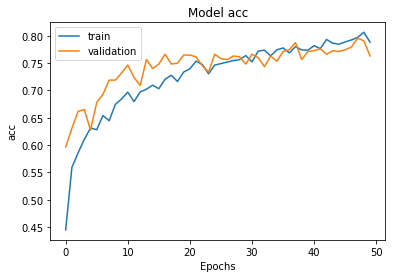

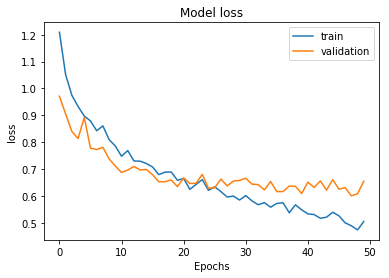

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 26s 756ms/step - loss: 1.3214 - acc: 0.3564 - val_loss: 1.1229 - val_acc: 0.4967
Epoch 2/50
35/35 [==============================] - 26s 738ms/step - loss: 1.0956 - acc: 0.5212 - val_loss: 0.9400 - val_acc: 0.6144
Epoch 3/50
35/35 [==============================] - 29s 834ms/step - loss: 1.0183 - acc: 0.5538 - val_loss: 0.8985 - val_acc: 0.6503
Epoch 4/50
35/35 [==============================] - 32s 906ms/step - loss: 0.9677 - acc: 0.6052 - val_loss: 0.9085 - val_acc: 0.6307
Epoch 5/50
35/35 [==============================] - 26s 749ms/step - loss: 0.9504 - acc: 0.5958 - val_loss: 0.8818 - val_acc: 0.6569
Epoch 6/50
35/35 [==============================] - 26s 733ms/step - loss: 0.9372 - acc: 0.5980 - val_loss: 0.8562 - val_acc: 0.6487
Epoch 7/50
35/35 [==============================] - 26s 754ms/step - loss: 0.8

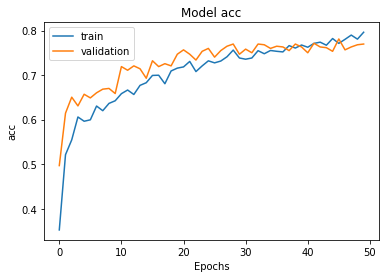

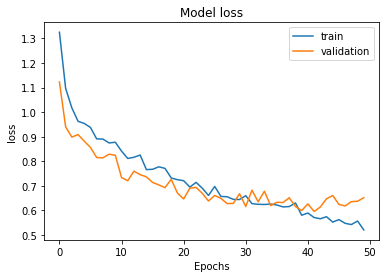

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 91s 657ms/step - loss: 1.2073 - acc: 0.4623 - val_loss: 0.8788 - val_acc: 0.6503
Epoch 2/50
138/138 [==============================] - 91s 662ms/step - loss: 0.9974 - acc: 0.5796 - val_loss: 0.8248 - val_acc: 0.6667
Epoch 3/50
138/138 [==============================] - 90s 655ms/step - loss: 0.9349 - acc: 0.6177 - val_loss: 0.7988 - val_acc: 0.6961
Epoch 4/50
138/138 [==============================] - 91s 659ms/step - loss: 0.8923 - acc: 0.6275 - val_loss: 0.7590 - val_acc: 0.7141
Epoch 5/50
138/138 [==============================] - 91s 658ms/step - loss: 0.8432 - acc: 0.6678 - val_loss: 0.8679 - val_acc: 0.6797
Epoch 6/50
138/138 [==============================] - 89s 648ms/step - loss: 0.8607 - acc: 0.6388 - val_loss: 0.8071 - val_acc: 0.6879
Epoch 7/50
138/138 [==============================] - 90s 654ms/st

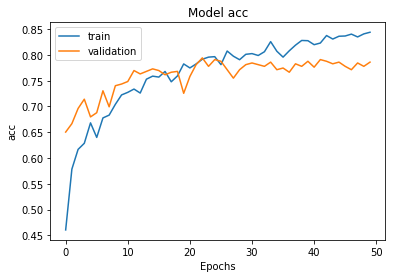

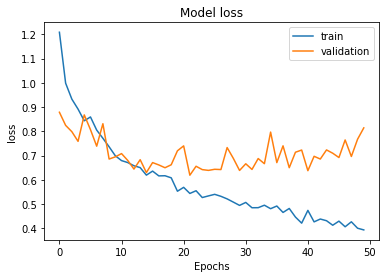

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 86s 1s/step - loss: 1.2804 - acc: 0.4412 - val_loss: 0.9958 - val_acc: 0.5931
Epoch 2/50
69/69 [==============================] - 84s 1s/step - loss: 1.0874 - acc: 0.5520 - val_loss: 0.9675 - val_acc: 0.6389
Epoch 3/50
69/69 [==============================] - 85s 1s/step - loss: 1.0249 - acc: 0.5742 - val_loss: 0.8655 - val_acc: 0.6552
Epoch 4/50
69/69 [==============================] - 85s 1s/step - loss: 0.9370 - acc: 0.6220 - val_loss: 0.8643 - val_acc: 0.6732
Epoch 5/50
69/69 [==============================] - 84s 1s/step - loss: 0.9285 - acc: 0.6168 - val_loss: 0.7808 - val_acc: 0.6846
Epoch 6/50
69/69 [==============================] - 84s 1s/step - loss: 0.8885 - acc: 0.6276 - val_loss: 0.7671 - val_acc: 0.6781
Epoch 7/50
69/69 [==============================] - 85s 1s/step - loss: 0.8538 - acc: 0.6480 - v

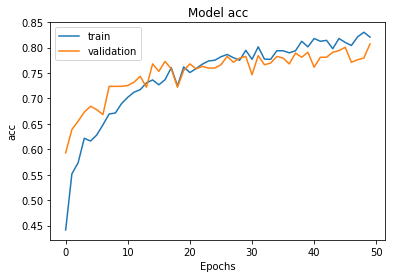

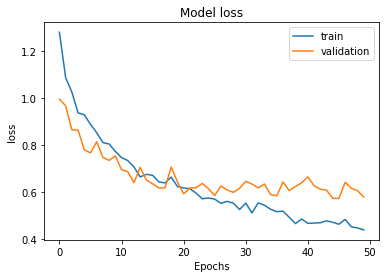

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 84s 2s/step - loss: 1.3156 - acc: 0.3783 - val_loss: 1.0818 - val_acc: 0.5735
Epoch 2/50
35/35 [==============================] - 81s 2s/step - loss: 1.0683 - acc: 0.5431 - val_loss: 0.9727 - val_acc: 0.6193
Epoch 3/50
35/35 [==============================] - 82s 2s/step - loss: 1.0144 - acc: 0.5744 - val_loss: 0.8940 - val_acc: 0.6356
Epoch 4/50
35/35 [==============================] - 82s 2s/step - loss: 0.9439 - acc: 0.5980 - val_loss: 0.8211 - val_acc: 0.6569
Epoch 5/50
35/35 [==============================] - 82s 2s/step - loss: 0.8972 - acc: 0.6320 - val_loss: 0.8391 - val_acc: 0.6699
Epoch 6/50
35/35 [==============================] - 81s 2s/step - loss: 0.9042 - acc: 0.6289 - val_loss: 0.7793 - val_acc: 0.6667
Epoch 7/50
35/35 [==============================] - 82s 2s/step - loss: 0.8648 - acc: 0.6418 - v

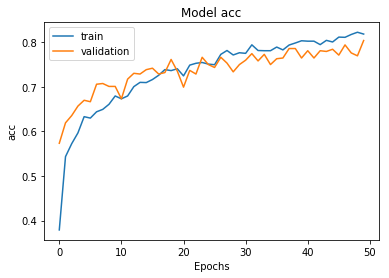

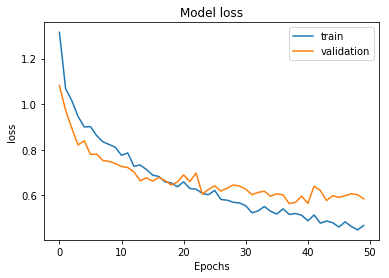

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 31s 223ms/step - loss: 1.1687 - acc: 0.4538 - val_loss: 0.9505 - val_acc: 0.6160
Epoch 2/50
138/138 [==============================] - 28s 205ms/step - loss: 0.9765 - acc: 0.5918 - val_loss: 0.8640 - val_acc: 0.6471
Epoch 3/50
138/138 [==============================] - 30s 214ms/step - loss: 0.9095 - acc: 0.6084 - val_loss: 0.7722 - val_acc: 0.6732
Epoch 4/50
138/138 [==============================] - 29s 210ms/step - loss: 0.8832 - acc: 0.6368 - val_loss: 0.8064 - val_acc: 0.6846
Epoch 5/50
138/138 [==============================] - 29s 214ms/step - loss: 0.8519 - acc: 0.6520 - val_loss: 0.7410 - val_acc: 0.6977
Epoch 6/50
138/138 [==============================] - 28s 206ms/step - loss: 0.8002 - acc: 0.6680 - val_loss: 0.7758 - val_acc: 0.7059
Epoch 7/50
138/138 [==============================] - 29s 212ms/st

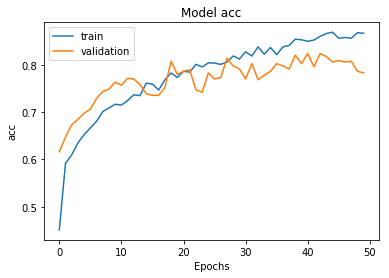

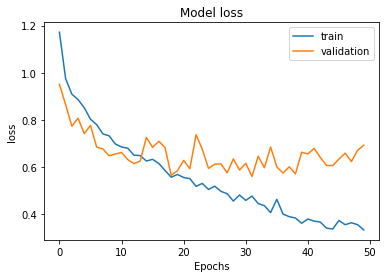

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 29s 414ms/step - loss: 1.2318 - acc: 0.4086 - val_loss: 0.9860 - val_acc: 0.5980
Epoch 2/50
69/69 [==============================] - 27s 393ms/step - loss: 1.0150 - acc: 0.5465 - val_loss: 0.8973 - val_acc: 0.6062
Epoch 3/50
69/69 [==============================] - 27s 398ms/step - loss: 0.9665 - acc: 0.5855 - val_loss: 0.8912 - val_acc: 0.6127
Epoch 4/50
69/69 [==============================] - 27s 396ms/step - loss: 0.9335 - acc: 0.5936 - val_loss: 0.8777 - val_acc: 0.6438
Epoch 5/50
69/69 [==============================] - 27s 396ms/step - loss: 0.8985 - acc: 0.6193 - val_loss: 0.8213 - val_acc: 0.6503
Epoch 6/50
69/69 [==============================] - 28s 404ms/step - loss: 0.8575 - acc: 0.6242 - val_loss: 0.8044 - val_acc: 0.6389
Epoch 7/50
69/69 [==============================] - 27s 392ms/step - loss: 0.8

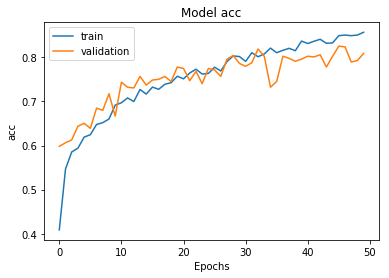

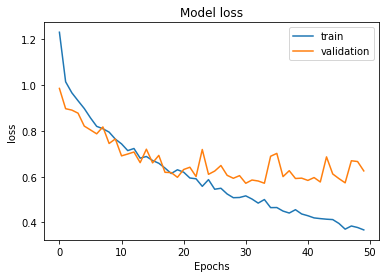

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 27s 778ms/step - loss: 1.2882 - acc: 0.3649 - val_loss: 1.0283 - val_acc: 0.5882
Epoch 2/50
35/35 [==============================] - 26s 746ms/step - loss: 1.0366 - acc: 0.5516 - val_loss: 0.9454 - val_acc: 0.5980
Epoch 3/50
35/35 [==============================] - 26s 748ms/step - loss: 0.9849 - acc: 0.5681 - val_loss: 0.8771 - val_acc: 0.6405
Epoch 4/50
35/35 [==============================] - 26s 741ms/step - loss: 0.9237 - acc: 0.6106 - val_loss: 0.8406 - val_acc: 0.6291
Epoch 5/50
35/35 [==============================] - 26s 744ms/step - loss: 0.9084 - acc: 0.6230 - val_loss: 0.8188 - val_acc: 0.6683
Epoch 6/50
35/35 [==============================] - 26s 740ms/step - loss: 0.8523 - acc: 0.6583 - val_loss: 0.7911 - val_acc: 0.6650
Epoch 7/50
35/35 [==============================] - 26s 742ms/step - loss: 0.8

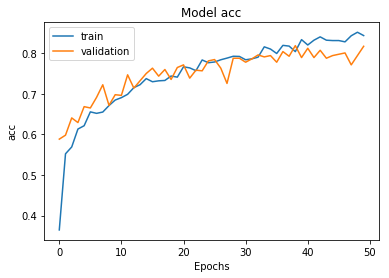

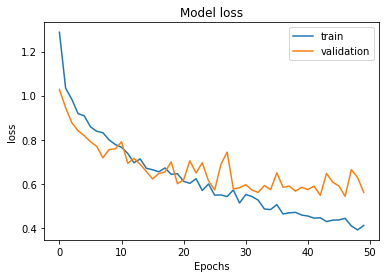

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 96s 695ms/step - loss: 1.2122 - acc: 0.4301 - val_loss: 0.9902 - val_acc: 0.5948
Epoch 2/50
138/138 [==============================] - 93s 670ms/step - loss: 1.0109 - acc: 0.5690 - val_loss: 0.8764 - val_acc: 0.6471
Epoch 3/50
138/138 [==============================] - 92s 669ms/step - loss: 0.9770 - acc: 0.5785 - val_loss: 0.8888 - val_acc: 0.6487
Epoch 4/50
138/138 [==============================] - 93s 676ms/step - loss: 0.9130 - acc: 0.5991 - val_loss: 0.7978 - val_acc: 0.7092
Epoch 5/50
138/138 [==============================] - 96s 699ms/step - loss: 0.9022 - acc: 0.6308 - val_loss: 0.7979 - val_acc: 0.7059
Epoch 6/50
138/138 [==============================] - 92s 666ms/step - loss: 0.8587 - acc: 0.6352 - val_loss: 0.7641 - val_acc: 0.6944
Epoch 7/50
138/138 [==============================] - 92s 664ms/st

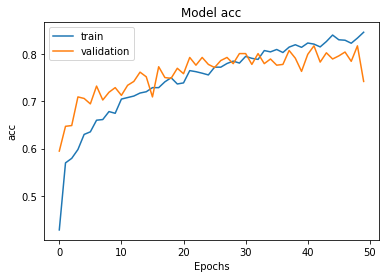

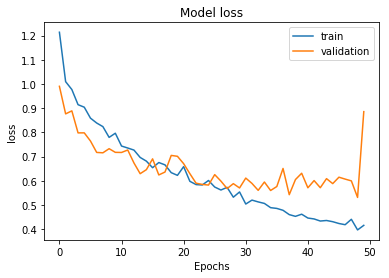

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 97s 1s/step - loss: 1.1902 - acc: 0.4602 - val_loss: 0.9886 - val_acc: 0.6127
Epoch 2/50
69/69 [==============================] - 89s 1s/step - loss: 0.9971 - acc: 0.5776 - val_loss: 0.9561 - val_acc: 0.6062
Epoch 3/50
69/69 [==============================] - 90s 1s/step - loss: 0.9495 - acc: 0.6079 - val_loss: 0.8142 - val_acc: 0.6683
Epoch 4/50
69/69 [==============================] - 92s 1s/step - loss: 0.9063 - acc: 0.6333 - val_loss: 0.7916 - val_acc: 0.6879
Epoch 5/50
69/69 [==============================] - 91s 1s/step - loss: 0.8479 - acc: 0.6482 - val_loss: 0.7224 - val_acc: 0.7206
Epoch 6/50
69/69 [==============================] - 90s 1s/step - loss: 0.8260 - acc: 0.6521 - val_loss: 0.7089 - val_acc: 0.7222
Epoch 7/50
69/69 [==============================] - 89s 1s/step - loss: 0.7761 - acc: 0.6788 - v

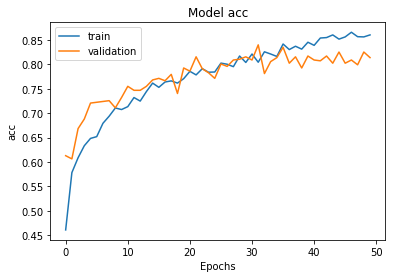

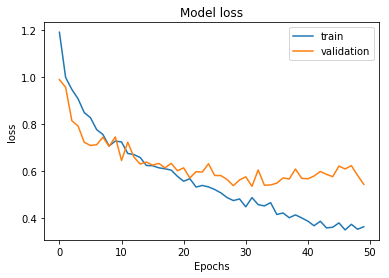

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 91s 3s/step - loss: 1.2361 - acc: 0.4314 - val_loss: 1.0250 - val_acc: 0.6111
Epoch 2/50
35/35 [==============================] - 87s 2s/step - loss: 1.0584 - acc: 0.5386 - val_loss: 0.9220 - val_acc: 0.6307
Epoch 3/50
35/35 [==============================] - 87s 2s/step - loss: 0.9882 - acc: 0.5802 - val_loss: 0.8522 - val_acc: 0.6716
Epoch 4/50
35/35 [==============================] - 87s 2s/step - loss: 0.9260 - acc: 0.6070 - val_loss: 0.8400 - val_acc: 0.6634
Epoch 5/50
35/35 [==============================] - 87s 2s/step - loss: 0.9179 - acc: 0.6221 - val_loss: 0.8055 - val_acc: 0.6536
Epoch 6/50
35/35 [==============================] - 88s 3s/step - loss: 0.8665 - acc: 0.6427 - val_loss: 0.7646 - val_acc: 0.7010
Epoch 7/50
35/35 [==============================] - 87s 2s/step - loss: 0.8463 - acc: 0.6458 - v

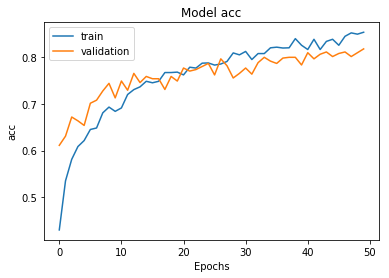

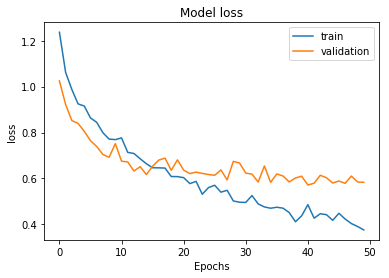

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 33s 242ms/step - loss: 1.1816 - acc: 0.4658 - val_loss: 0.9781 - val_acc: 0.5458
Epoch 2/50
138/138 [==============================] - 31s 224ms/step - loss: 1.0567 - acc: 0.5452 - val_loss: 0.8910 - val_acc: 0.5866
Epoch 3/50
138/138 [==============================] - 32s 228ms/step - loss: 0.9612 - acc: 0.5832 - val_loss: 0.8736 - val_acc: 0.6078
Epoch 4/50
138/138 [==============================] - 31s 228ms/step - loss: 0.9242 - acc: 0.5918 - val_loss: 0.8655 - val_acc: 0.6078
Epoch 5/50
138/138 [==============================] - 32s 229ms/step - loss: 0.8719 - acc: 0.6207 - val_loss: 0.8416 - val_acc: 0.6520
Epoch 6/50
138/138 [==============================] - 32s 229ms/step - loss: 0.8058 - acc: 0.6555 - val_loss: 0.8267 - val_acc: 0.6503
Epoch 7/50
138/138 [==============================] - 31s 226ms/st

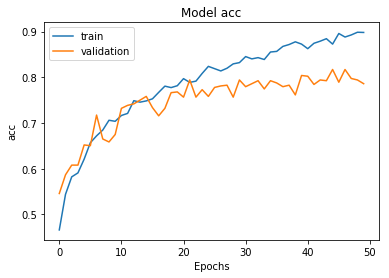

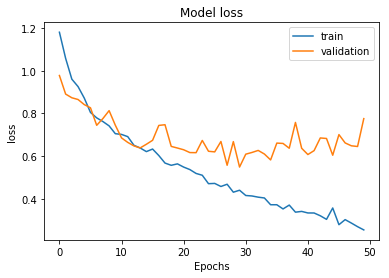

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 31s 452ms/step - loss: 1.2291 - acc: 0.4229 - val_loss: 1.0748 - val_acc: 0.5000
Epoch 2/50
69/69 [==============================] - 30s 428ms/step - loss: 1.0529 - acc: 0.5423 - val_loss: 0.9167 - val_acc: 0.5850
Epoch 3/50
69/69 [==============================] - 30s 432ms/step - loss: 0.9578 - acc: 0.5817 - val_loss: 0.8617 - val_acc: 0.6078
Epoch 4/50
69/69 [==============================] - 30s 429ms/step - loss: 0.8926 - acc: 0.6141 - val_loss: 0.8581 - val_acc: 0.6291
Epoch 5/50
69/69 [==============================] - 30s 441ms/step - loss: 0.9154 - acc: 0.6140 - val_loss: 0.8224 - val_acc: 0.6454
Epoch 6/50
69/69 [==============================] - 30s 430ms/step - loss: 0.8562 - acc: 0.6347 - val_loss: 0.7729 - val_acc: 0.6961
Epoch 7/50
69/69 [==============================] - 30s 439ms/step - loss: 0.8

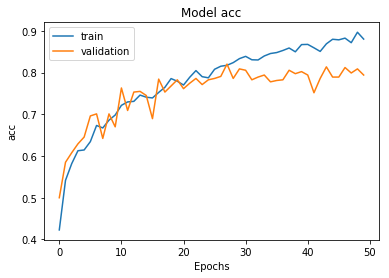

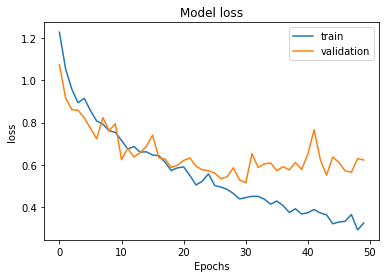

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 30s 870ms/step - loss: 1.2621 - acc: 0.4002 - val_loss: 1.0998 - val_acc: 0.5507
Epoch 2/50
35/35 [==============================] - 29s 817ms/step - loss: 1.0500 - acc: 0.5427 - val_loss: 0.9390 - val_acc: 0.5948
Epoch 3/50
35/35 [==============================] - 29s 817ms/step - loss: 1.0055 - acc: 0.5757 - val_loss: 0.9352 - val_acc: 0.5866
Epoch 4/50
35/35 [==============================] - 28s 811ms/step - loss: 0.9137 - acc: 0.6096 - val_loss: 0.8608 - val_acc: 0.6275
Epoch 5/50
35/35 [==============================] - 29s 826ms/step - loss: 0.9129 - acc: 0.6061 - val_loss: 0.8901 - val_acc: 0.6013
Epoch 6/50
35/35 [==============================] - 28s 808ms/step - loss: 0.9067 - acc: 0.6106 - val_loss: 0.8406 - val_acc: 0.6471
Epoch 7/50
35/35 [==============================] - 30s 844ms/step - loss: 0.8

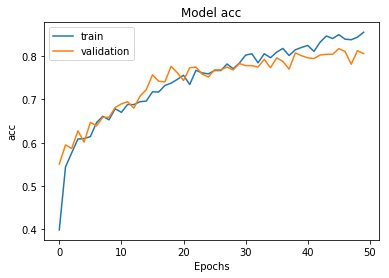

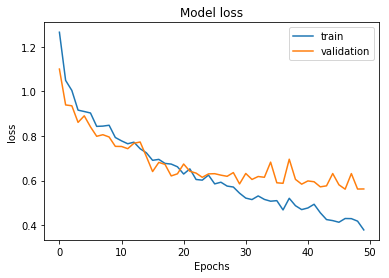

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 106s 769ms/step - loss: 1.2320 - acc: 0.4243 - val_loss: 0.9339 - val_acc: 0.6029
Epoch 2/50
138/138 [==============================] - 107s 778ms/step - loss: 0.9641 - acc: 0.5948 - val_loss: 0.8436 - val_acc: 0.6356
Epoch 3/50
138/138 [==============================] - 105s 759ms/step - loss: 0.8985 - acc: 0.6208 - val_loss: 0.8297 - val_acc: 0.6209
Epoch 4/50
138/138 [==============================] - 106s 767ms/step - loss: 0.8455 - acc: 0.6453 - val_loss: 0.7161 - val_acc: 0.7173
Epoch 5/50
138/138 [==============================] - 105s 761ms/step - loss: 0.7898 - acc: 0.6724 - val_loss: 0.7300 - val_acc: 0.7141
Epoch 6/50
138/138 [==============================] - 106s 767ms/step - loss: 0.7762 - acc: 0.6869 - val_loss: 0.7543 - val_acc: 0.6797
Epoch 7/50
138/138 [==============================] - 106s 7

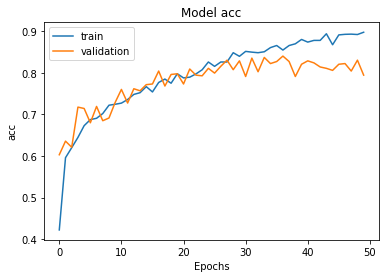

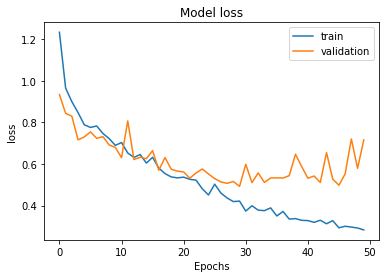

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 107s 2s/step - loss: 1.2314 - acc: 0.4151 - val_loss: 0.9584 - val_acc: 0.5654
Epoch 2/50
69/69 [==============================] - 100s 1s/step - loss: 1.0343 - acc: 0.5563 - val_loss: 0.8921 - val_acc: 0.6193
Epoch 3/50
69/69 [==============================] - 122s 2s/step - loss: 0.9530 - acc: 0.5984 - val_loss: 0.9011 - val_acc: 0.5948
Epoch 4/50
69/69 [==============================] - 117s 2s/step - loss: 0.8829 - acc: 0.6369 - val_loss: 0.8690 - val_acc: 0.6552
Epoch 5/50
69/69 [==============================] - 114s 2s/step - loss: 0.8596 - acc: 0.6598 - val_loss: 0.7360 - val_acc: 0.7141
Epoch 6/50
69/69 [==============================] - 106s 2s/step - loss: 0.8103 - acc: 0.6714 - val_loss: 0.6923 - val_acc: 0.7320
Epoch 7/50
69/69 [==============================] - 112s 2s/step - loss: 0.7885 - acc: 0.6

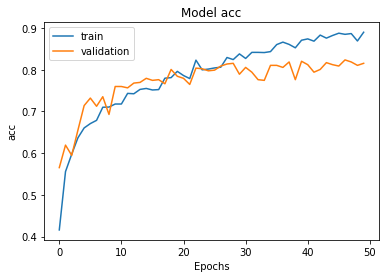

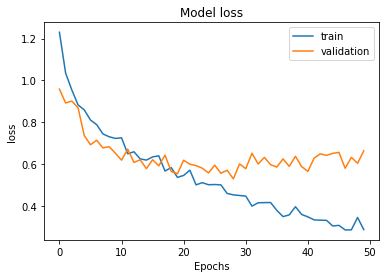

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 101s 3s/step - loss: 1.2474 - acc: 0.4230 - val_loss: 0.9766 - val_acc: 0.5850
Epoch 2/50
35/35 [==============================] - 99s 3s/step - loss: 1.0231 - acc: 0.5654 - val_loss: 0.8469 - val_acc: 0.6503
Epoch 3/50
35/35 [==============================] - 101s 3s/step - loss: 0.9559 - acc: 0.5994 - val_loss: 0.8505 - val_acc: 0.6503
Epoch 4/50
35/35 [==============================] - 99s 3s/step - loss: 0.9244 - acc: 0.6043 - val_loss: 0.8147 - val_acc: 0.6993
Epoch 5/50
35/35 [==============================] - 97s 3s/step - loss: 0.8845 - acc: 0.6280 - val_loss: 0.7954 - val_acc: 0.6667
Epoch 6/50
35/35 [==============================] - 96s 3s/step - loss: 0.8607 - acc: 0.6485 - val_loss: 0.7551 - val_acc: 0.6846
Epoch 7/50
35/35 [==============================] - 96s 3s/step - loss: 0.8248 - acc: 0.6516 -

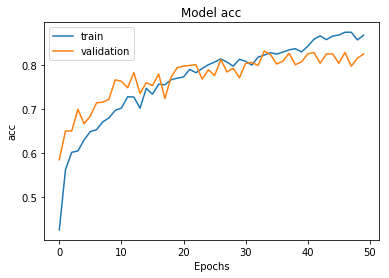

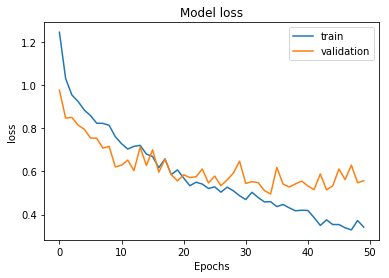

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


ValueError: Negative dimension size caused by subtracting 3 from 2 for 'conv2d_65/convolution' (op: 'Conv2D') with input shapes: [?,2,2,128], [3,3,128,256].

In [7]:
Results = []

for nb_layers in range(1,6):
    for img_size in [64,128]: 
        for batch_size in [16,32,64]:
            train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
            model = create_model(32,nb_layers,img_size = img_size)
            History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 50,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                             )
            print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ' :')
            draw_graph(History, 'acc')
            draw_graph(History, 'loss')
            result = model.evaluate_generator(test_generator, len(test_generator))
            Results.append(result)

In [ ]:
save_model(model)

draw_graph(History, 'acc')
draw_graph(History, 'loss')

In [8]:
i = 0
print('Layers ' + ' ImgSize ' + ' Bathc size ' + ' Accuracy ')
for nb_layers in range(1,5):
    for img_size in [64,128]: 
        for batch_size in [16,32,64]:
            #print( ''  str(nb_layers) + ' %3d' + str(img_size) + '  %2' + str(batch_size) + ' '+ str(Results[i][0]))
            print( '%6d  %7d  %10d  %8.3f ' % (nb_layers,img_size,batch_size,Results[i][1]*100))
            i = i + 1

Layers  ImgSize  Bathc size  Accuracy 
     1       64          16    75.081 
     1       64          32    75.405 
     1       64          64    75.081 
     1      128          16    74.110 
     1      128          32    77.670 
     1      128          64    75.405 
     2       64          16    77.023 
     2       64          32    76.375 
     2       64          64    76.052 
     2      128          16    76.052 
     2      128          32    78.317 
     2      128          64    76.699 
     3       64          16    76.052 
     3       64          32    77.994 
     3       64          64    77.023 
     3      128          16    76.052 
     3      128          32    79.935 
     3      128          64    77.670 
     4       64          16    77.994 
     4       64          32    80.259 
     4       64          64    79.288 
     4      128          16    78.641 
     4      128          32    79.612 
     4      128          64    81.553 
